## imports

In [16]:
import numpy as np 
from scipy import misc
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [7]:
face = misc.face(gray=True) 
    

In [10]:
n_clusters = 5
np.random.seed(0)

In [13]:
X = face.reshape((-1,1))
k_means = KMeans(n_clusters=n_clusters, n_init=4)
k_means.fit(X)
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_

In [14]:
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

vmin = face.min()
vmax = face.max()

### Real image

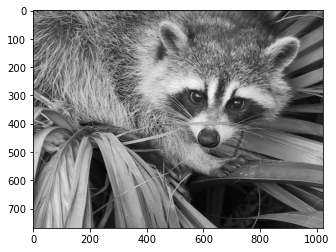

In [18]:
plt.figure(1)
plt.imshow(face, cmap=plt.cm.gray, vmin=vmin, vmax=256)

### Compressed image

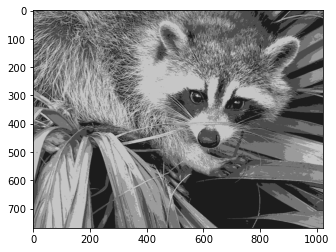

In [19]:
plt.figure(2)
plt.imshow(face_compressed, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)

### Looking for difference

In [30]:
def mse(imageA,imageB):
    err = np.sum((imageA.astype('float') - imageB.astype('float'))**2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

In [33]:
mse(face, face_compressed)

# 0 means perfect similarity
# large distances between pixel intensities do not necessarily mean the contents of the image are dramatically different

154.9212615617188

### structural similarity index: it preceives change in structural change
### mse preceives errors

In [38]:
from skimage.metrics import structural_similarity as ssim

In [39]:
ssim(face,face_compressed)

<ipython-input-39-141b219c659a>:1: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  ssim(face,face_compressed)


0.7840483274256309

### ssim value of 1 indicates perfect similarity... we got 0.78 meaning 78% match or equal in quality